In [6]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import pandas_datareader as pdr

In [63]:
pip install numpy

In [61]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [66]:
pip install chart-studio

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11448 sha256=a0c69e5397da7d699e60e58eb7e84938e138f6b29535152286ee2b3beaf345aa
  Stored in directory: c:\users\ayub\appdata\local\pip\cache\wheels\ce\18\7f\e9527e3e66db1456194ac7f61eb3211068c409edceecff2d31
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [68]:
from chart_studio import plotly  

In [71]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

In [72]:
from chart_studio import plotly

In [7]:
import datetime

In [8]:
import seaborn as sns

In [17]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 1)
start_date_str = str(start.date())
end_date_str = str(end.date())

In [18]:
stocks = ['AAPL']

In [19]:
for ticker in stocks:
    file_name = 'data/' + '_' + start_date_str + '_to_' + end_date_str + '.csv'
    print(file_name)
    data = pdr.DataReader(ticker, 'yahoo', start, end)
    print(data.shape)
    data.to_csv(file_name)

data/_2010-01-01_to_2020-01-01.csv
(2516, 6)


In [23]:
for (i, ticker) in enumerate(stocks):
    file_name = 'data/' + ticker + '_' + start_date_str + '_to_' + end_date_str + '.csv'
    print(file_name)
    data = pd.read_csv('data/_2010-01-01_to_2020-01-01.csv')
    print(data.shape)
    data['Name'] = ticker
    data.to_csv(file_name)
    
    if i == 0:
        all_stocks = data
    else:
        all_stocks = all_stocks.append(data)
        
print(all_stocks.shape)
all_stocks_file_name = 'data/_2010-01-01_to_2020-01-01.csv'
all_stocks.to_csv(all_stocks_file_name)

data/AAPL_2010-01-01_to_2020-01-01.csv
(2516, 7)
(2516, 8)


In [24]:
all_stocks = pd.read_csv('data/_2010-01-01_to_2020-01-01.csv')

In [30]:
all_stocks_2010 = all_stocks.loc[2010]

In [31]:
all_stocks_2010

Unnamed: 0          2010
Date          2017-12-27
High              42.695
Low            42.427502
Open           42.525002
Close          42.650002
Volume        85992800.0
Adj Close       40.62315
Name                AAPL
Name: 2010, dtype: object

In [32]:
all_stocks

,Unnamed: 0,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526021,AAPL
1,1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537304,AAPL
2,2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433319,AAPL
3,3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426,AAPL
4,4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.464117,AAPL
...,...,...,...,...,...,...,...,...,...
2511,2511,2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.738716,AAPL
2512,2512,2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.122368,AAPL
2513,2513,2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.095383,AAPL
2514,2514,2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.517342,AAPL


In [36]:
all_stocks.head


<bound method NDFrame.head of       Unnamed: 0        Date       High        Low       Open      Close  \
0              0  2010-01-04   7.660714   7.585000   7.622500   7.643214   
1              1  2010-01-05   7.699643   7.616071   7.664286   7.656429   
2              2  2010-01-06   7.686786   7.526786   7.656429   7.534643   
3              3  2010-01-07   7.571429   7.466071   7.562500   7.520714   
4              4  2010-01-08   7.571429   7.466429   7.510714   7.570714   
...          ...         ...        ...        ...        ...        ...   
2511        2511  2019-12-24  71.222504  70.730003  71.172501  71.067497   
2512        2512  2019-12-26  72.495003  71.175003  71.205002  72.477501   
2513        2513  2019-12-27  73.492500  72.029999  72.779999  72.449997   
2514        2514  2019-12-30  73.172501  71.305000  72.364998  72.879997   
2515        2515  2019-12-31  73.419998  72.379997  72.482498  73.412498   

           Volume  Adj Close  Name  
0     493729600.0   

In [37]:
all_stocks.tail


<bound method NDFrame.tail of       Unnamed: 0        Date       High        Low       Open      Close  \
0              0  2010-01-04   7.660714   7.585000   7.622500   7.643214   
1              1  2010-01-05   7.699643   7.616071   7.664286   7.656429   
2              2  2010-01-06   7.686786   7.526786   7.656429   7.534643   
3              3  2010-01-07   7.571429   7.466071   7.562500   7.520714   
4              4  2010-01-08   7.571429   7.466429   7.510714   7.570714   
...          ...         ...        ...        ...        ...        ...   
2511        2511  2019-12-24  71.222504  70.730003  71.172501  71.067497   
2512        2512  2019-12-26  72.495003  71.175003  71.205002  72.477501   
2513        2513  2019-12-27  73.492500  72.029999  72.779999  72.449997   
2514        2514  2019-12-30  73.172501  71.305000  72.364998  72.879997   
2515        2515  2019-12-31  73.419998  72.379997  72.482498  73.412498   

           Volume  Adj Close  Name  
0     493729600.0   

In [41]:
all_stocks.isnull()

,Unnamed: 0,Date,High,Low,Open,Close,Volume,Adj Close,Name
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2511,False,False,False,False,False,False,False,False,False
2512,False,False,False,False,False,False,False,False,False
2513,False,False,False,False,False,False,False,False,False
2514,False,False,False,False,False,False,False,False,False


In [38]:
all_stocks.describe

<bound method NDFrame.describe of       Unnamed: 0        Date       High        Low       Open      Close  \
0              0  2010-01-04   7.660714   7.585000   7.622500   7.643214   
1              1  2010-01-05   7.699643   7.616071   7.664286   7.656429   
2              2  2010-01-06   7.686786   7.526786   7.656429   7.534643   
3              3  2010-01-07   7.571429   7.466071   7.562500   7.520714   
4              4  2010-01-08   7.571429   7.466429   7.510714   7.570714   
...          ...         ...        ...        ...        ...        ...   
2511        2511  2019-12-24  71.222504  70.730003  71.172501  71.067497   
2512        2512  2019-12-26  72.495003  71.175003  71.205002  72.477501   
2513        2513  2019-12-27  73.492500  72.029999  72.779999  72.449997   
2514        2514  2019-12-30  73.172501  71.305000  72.364998  72.879997   
2515        2515  2019-12-31  73.419998  72.379997  72.482498  73.412498   

           Volume  Adj Close  Name  
0     493729600.

In [43]:
all_stocks.isnull()

,Unnamed: 0,Date,High,Low,Open,Close,Volume,Adj Close,Name
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2511,False,False,False,False,False,False,False,False,False
2512,False,False,False,False,False,False,False,False,False
2513,False,False,False,False,False,False,False,False,False
2514,False,False,False,False,False,False,False,False,False


In [48]:
import matplotlib.pyplot as plt


In [49]:
all_stocks.head

<bound method NDFrame.head of       Unnamed: 0        Date       High        Low       Open      Close  \
1              1  2010-01-05   7.699643   7.616071   7.664286   7.656429   
2              2  2010-01-06   7.686786   7.526786   7.656429   7.534643   
3              3  2010-01-07   7.571429   7.466071   7.562500   7.520714   
4              4  2010-01-08   7.571429   7.466429   7.510714   7.570714   
5              5  2010-01-11   7.607143   7.444643   7.600000   7.503929   
...          ...         ...        ...        ...        ...        ...   
2511        2511  2019-12-24  71.222504  70.730003  71.172501  71.067497   
2512        2512  2019-12-26  72.495003  71.175003  71.205002  72.477501   
2513        2513  2019-12-27  73.492500  72.029999  72.779999  72.449997   
2514        2514  2019-12-30  73.172501  71.305000  72.364998  72.879997   
2515        2515  2019-12-31  73.419998  72.379997  72.482498  73.412498   

           Volume  Adj Close  Name  
1     601904800.0   

<AxesSubplot:>

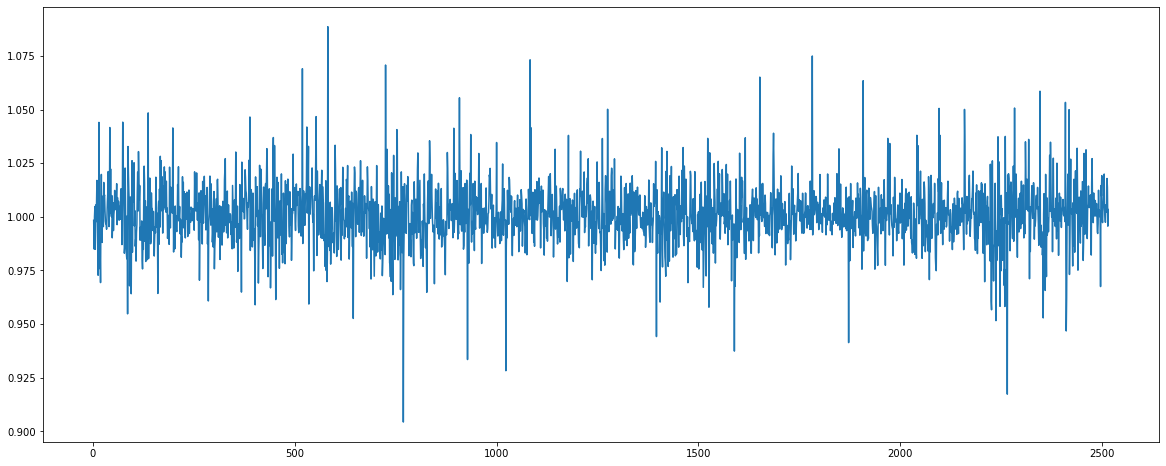

In [56]:
all_stocks['Change'] = all_stocks.High.div(all_stocks.High.shift())
all_stocks['Change'].plot(figsize=(20,8))